# Comparing Employee Satisfaction Surveys From Two Sources

**by Gerard Tieng**

In this project, we will be comparing employee exit surveys from two different sources—the [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the [Technical and Futher Education (TAFE)](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) from Queensland, Australia—to determine dissatisfaction rates based on terms of service. Demonstrated skills will include:
- Advanced Data Cleansing
- Obejct Mapping
- Table Joining
- Regular Expression


## Importing and Inspecting the Datasets

First, we'll begin by importing Pandas and Numpy, which will be the main libraries used to examine the two datasets.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

The DETE dataset is fairly organized with 800+ records and 56 feature columns.

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Meanwhile the TAFE dataset includes overly complicated column names at roughly 700 records and 72 feature columns.

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

There is much more information in both sets than needed. In the DETE set, we'll eliminate columns in the latter portion which deal with personal info not realted to job dissatisfaction. We'll apply the same logic to the middle set of columns in the TAFE dataset.

In [10]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


## Data Cleansing

### Part 1: Column Names

With the amount of null values and complicated titles in columns, our first step in cleaning the data will be to remedy those two problems. The following code will uniform the names in the DETE dataset as lowercasse and replace spaces with underscores for snake-case titles. Meanwhile, we've isolated the main columns we want to keep from the TAFE dataset and will use **Dataframe.rename** to pass a custom dictionary.

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [15]:
col_tafe = {"Record ID":"id", 
          "CESSATION YEAR": "cease_date",
         "Reason for ceasing employment": "separationtype",
         "Gender. What is your Gender?": "gender",
         "CurrentAge. Current Age": "age",
         "Employment Type. Employment Type": "employment_status",
         "Classification. Classification": "position",
         "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
         "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"}

tafe_survey_updated = tafe_survey_updated.rename(columns=col_tafe)

### Part 2: Isolating Resignations

As we'll be conentrating on those who have resigned from the company, we also renamed the appropriate columns from each respective datasets to match as "separationtype" ahead of subsetting the "resignation" values in a future step.

In [16]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Here, we modify the string to group all resignation types in the DETE survey under one resignation category.

In [18]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]

In [20]:
dete_resignations = dete_survey_updated.copy()
tafe_resignations = tafe_survey_updated.copy()

### Part 3: Cleansing Values

Now taking a look at the termination years, we can see that there will need to be some cleansing work to do in this column.

In [21]:
dete_resignations["cease_date"].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
04/2014      2
08/2012      2
02/2014      2
04/2013      2
09/2010      1
2014         1
09/2014      1
11/2012      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

Here, we'll convert the column values to string to eliminate any slash symbols and extract four-digit years only.

In [22]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    354
2013.0    380
2014.0     51
Name: cease_date, dtype: int64

In order to establish the length of employment in DETE dataset, we'll subtract the Start Date series from the Cease Date series to get that information. Meanwhile, the TAFE dataset includes a column featuring the length of employment in years. No calculation needed there.

In [25]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

### Part 4: Selecting Resignation Rows

In this portion of the data cleansing, we'll examine the values under each job disssatisfaction column.


The code below is another example of reformatting values, this time using **Series.applymap** to pass a renaming function in the TAFE dataset.

In [26]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

In [29]:
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)

In [30]:
tafe_resignations["dissatisfied"].value_counts()

False    322
True     115
Name: dissatisfied, dtype: int64

For the DETE dataset, we'll use the Series.any() method to label an employee as "dissatisfied" if any value corresponding dissatisfaction columns returns a true value.

In [31]:
dete_diss_cols = ["job_dissatisfaction", 
                  "dissatisfaction_with_the_department", 
                  "physical_work_environment", 
                  "lack_of_recognition", 
                  "lack_of_job_security", 
                  "work_location", 
                  "employment_conditions", 
                  "work_life_balance", 
                  "workload"]

In [32]:
dete_resignations["dissatisfied"] = dete_resignations[dete_diss_cols].any(axis=1, skipna=False)

In [33]:
dete_resignations["dissatisfied"].value_counts()

False    447
True     375
Name: dissatisfied, dtype: int64

In [34]:
dete_resignations[dete_diss_cols]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
0,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False
6,True,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False


In [35]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Now that we have our all resigned employees identified and cleaned the years of service. The two datasets are now ready to be combined.

### Combining the Datasers

Before we compile the datasets, we'll add a column that identifies to which dataset any row of data belongs.

In [36]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [37]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

Now combined, we'll look for any null values and drop them from the final set. The code below eliminates any column containing more than 500 null values.

In [38]:
combined_updated = combined.dropna(thresh=500, axis=1)

Comparing years of service, we will require all values to be a numerical value for drawing into plots.

In [39]:
combined_updated["institute_service"].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
1.0                    36
5.0                    34
3.0                    31
0.0                    31
4.0                    28
6.0                    27
2.0                    23
22.0                   22
37.0                   21
9.0                    20
15.0                   18
13.0                   18
23.0                   17
43.0                   17
7.0                    17
17.0                   16
24.0                   16
38.0                   15
16.0                   15
21.0                   15
14.0                   14
8.0                    14
35.0                   14
39.0                   14
12.0                   14
11.0                   13
10.0                   13
19.0                   13
42.0                   13
32.0                   12
20.0                   12
34.0        

In this instance, we'll use Regular Expression to isolate the number value from the values that contain symbols and strings.

In [40]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service"] = combined_updated["institute_service"].astype("float")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [42]:
combined_updated["institute_service"].value_counts()

1.0     285
3.0     127
11.0    102
20.0     83
5.0      82
7.0      60
0.0      31
4.0      28
6.0      27
2.0      23
22.0     22
37.0     21
9.0      20
15.0     18
13.0     18
43.0     17
23.0     17
17.0     16
24.0     16
38.0     15
16.0     15
21.0     15
14.0     14
8.0      14
35.0     14
12.0     14
39.0     14
10.0     13
42.0     13
19.0     13
34.0     12
32.0     12
26.0     11
41.0     11
33.0     11
18.0     11
31.0     10
25.0     10
40.0      8
28.0      8
29.0      8
36.0      7
27.0      7
44.0      7
45.0      5
30.0      4
49.0      3
50.0      1
46.0      1
48.0      1
Name: institute_service, dtype: int64

With all of our year values now in numerics, we'll bin our employees into four categories under the rules in the function below and use **Series.apply()** to add the results to a new column.

In [43]:
def service_class(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 10:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif val < 3:
        return "New"
    elif pd.isnull(val):
        return np.nan

In [44]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(service_class)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Lastly, we'll convert any null values left to the larger of the two categories in order to plot the result but not skew the data too heavily.

In [46]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    769
True     490
NaN      265
Name: dissatisfied, dtype: int64

## Plotting and Analysis

Dissatisfied employees will be selected and averaged with the **Dataframe.pivot_table()** method and then plotted into a bar-format figure.

In [49]:
dissatisfaction_df = combined_updated.pivot_table(index="service_cat", values="dissatisfied")

In [47]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


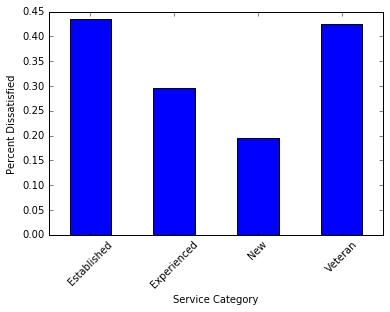

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

dissatisfaction_df.plot(kind="bar", rot=45, legend=None)
plt.xlabel("Service Category")
plt.ylabel("Percent Dissatisfied")


It seems that